In [10]:
from my_functions import *
import numpy as np 
import matplotlib.pyplot as plt
from constants import *
from Voronoi_functions import *
from scipy.spatial import Voronoi, voronoi_plot_2d
from tqdm import tqdm
import os

### *Voronoi Plotting*

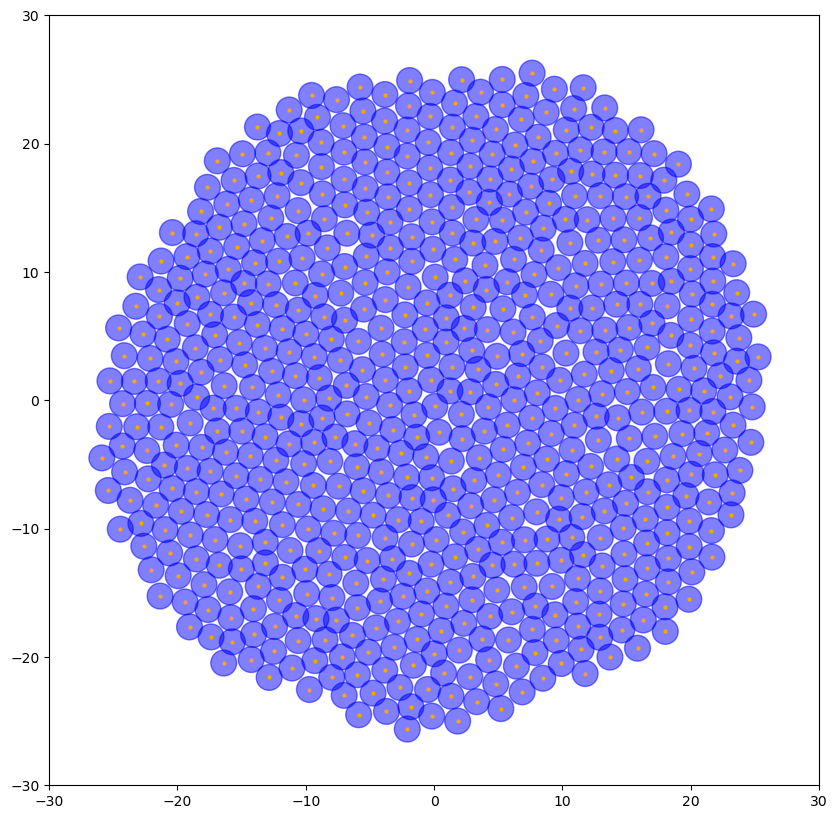

In [15]:
def plot_interaction_line(Voronoi_class, interaction, axis):
    """Plots both interaction line and center point between the two points"""
    
    point1, point2 = Voronoi_class.points[interaction[0]], Voronoi_class.points[interaction[1]]
    
    #Calcs center value
    center = (point1 + point2)/2
    
    # Plots the line
    axis.plot([point1[0], point2[0]], [point1[1], point2[1]], color = "red", alpha = 0.5)
    
    #Plots the center of the interaction line
    axis.scatter(center[0], center[1], marker="o", s = 10, color = "black", alpha = 0.8)
    
def plot_nearest_neighbour(Voronoi_class, cell_index, axis):
    """Plots only the nearest neighbours (The difference is very small)"""
    
    nearest_neighbours = get_nearest_neighbours(Voronoi_class.ridge_points, cell_index, Voronoi_class.points)
    
    for neighbour in nearest_neighbours: 
        point1, point2 = Voronoi_class.points[cell_index], Voronoi_class.points[neighbour]
        
        #Calcs center value
        center = (point1 + point2)/2
        
        # Plots the line
        axis.plot([point1[0], point2[0]], [point1[1], point2[1]], color = "red", alpha = 0.5)
        
        #Plots the center of the interaction line
        axis.scatter(center[0], center[1], marker="o", s = 10, color = "black", alpha = 0.8)
        
        
### Actually Plotting ###
fig, axis = plt.subplots(figsize=(10, 10))
screen_size = (-30, 30)

# Loads the steady state from the interaction_force
steady_state = load_points("SteadyState_625cells_600s_2.txt")

# Generates the voronoi diagram and voronoi class
vor = Voronoi(steady_state)
#voronoi_plot_2d(vor, axis, show_vertices=False, line_colors='black', line_width=2, line_alpha=0.6, point_size=0)

for i, point in enumerate(steady_state):
    # Plots circles
    circle = plt.Circle((point[0], point[1]), r_cell, color = "blue", alpha = 0.5)
    axis.add_patch(circle)
    
    # Plots points
    axis.scatter(point[0], point[1], marker="o", s = 4, label = f"{i}", color = "orange")
    
# Plots the vertices    
#axis.scatter(vor.vertices[:, 0], vor.vertices[:, 1], marker="x", color = "black", label = "Vertices")
  
# #Plots the interaction lines for Nearest neighbours and center points
# for cell_index in tqdm(range(len(vor.points))):
#     plot_nearest_neighbour(vor, cell_index, axis)


axis.set_xlim(screen_size)
axis.set_ylim(screen_size);
axis.set_aspect('equal')

In [9]:
# # Printing changes in neighbours and nearest neighbours
# for cell in range(len(vor.points)):   
#     neighbours = get_interacting_neighbors(vor.ridge_points, cell)
#     nearest_neighbours = get_nearest_neighbours(vor.ridge_points, cell, vor.points)
#     print(f"For cell {cell} is neighbour the same; {nearest_neighbours == neighbours}, Neighbours : {neighbours} , {nearest_neighbours}")

[163, 398, 444, 123]


array([ 81.5, 199. , 222. ,  61.5])